## Aggregating results to DataFrame

In [1]:
import os
import lib
import numpy as np
import pandas as pd

DATASETS = [
    "abalone",
    "adult",
    "buddy",
    "california",
    "cardio",
    "churn2",
    "default",
    "diabetes",
    "fb-comments",
    "gesture",
    "higgs-small",
    "house",
    "insurance",
    "king",
    "miniboone",
    "wilt"
]

_REGRESSION = [
    "abalone",
    "california",
    "fb-comments",
    "house",
    "insurance",
    "king",
]


method2exp = {
    "real": "exp/{}/ddpm_cb_best/",
    "tab-ddpm": "exp/{}/ddpm_cb_best/",
    "smote": "exp/{}/smote/",
    "ctabgan+": "exp/{}/ctabgan-plus/",
    "ctabgan": "exp/{}/ctabgan/",
    "tvae": "exp/{}/tvae/"
}

eval_file = "eval_catboost.json"
show_std = False
df = pd.DataFrame(columns=["method"] + [_[:3].upper() for _ in DATASETS])

for algo in method2exp: 
    algo_res = []
    for ds in DATASETS:
        if not os.path.exists(os.path.join(method2exp[algo].format(ds), eval_file)):
            algo_res.append("--")
            continue
        metric = "r2" if ds in _REGRESSION else "f1"
        res_dict = lib.load_json(os.path.join(method2exp[algo].format(ds), eval_file))

        if algo == "real":
            res = f'{res_dict["real"]["test"][metric + "-mean"]:.4f}' 
            if show_std: res += f'+-{res_dict["real"]["test"][metric + "-std"]:.4f}'
        else:
            res = f'{res_dict["synthetic"]["test"][metric + "-mean"]:.4f}'
            if show_std: res += f'+-{res_dict["synthetic"]["test"][metric + "-std"]:.4f}'

        algo_res.append(res)
    df.loc[len(df)] = [algo] + algo_res

In [2]:
df

,method,ABA,ADU,BUD,CAL,CAR,CHU,DEF,DIA,FB-,GES,HIG,HOU,INS,KIN,MIN,WIL
0,real,0.5562,0.8152,0.9063,0.8568,0.7379,0.7403,0.6880,0.7849,0.8371,0.6365,0.7238,0.6616,0.8137,0.9070,0.9342,0.8982
1,tab-ddpm,0.5499,0.7951,0.9057,0.8362,0.7374,0.7548,0.6910,0.7372,0.7128,0.5967,0.7218,0.6766,0.8092,0.8331,0.9362,0.9045
2,smote,0.5486,0.7912,0.8906,0.8397,0.7323,0.7432,0.6930,0.6835,0.8035,0.6579,0.7219,0.6625,0.8119,0.8416,0.9323,0.9127
3,ctabgan+,0.4672,0.7724,0.8844,0.5247,0.7327,0.7024,0.6865,0.7339,0.5088,0.4055,0.6639,0.5040,0.7966,0.4438,0.8920,0.7983
4,ctabgan,--,0.7831,0.8552,--,0.7171,0.6875,0.6437,0.7310,--,0.3922,0.5748,--,--,--,0.8892,0.9060
5,tvae,0.4328,0.7810,0.8638,0.7518,0.7174,0.7317,0.6564,0.7136,0.6853,0.4340,0.6378,0.4926,0.7842,0.8238,0.9125,0.5006


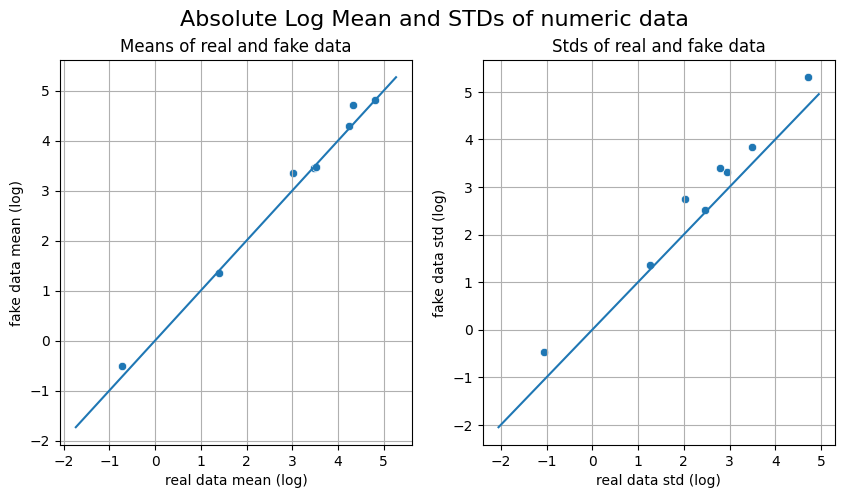

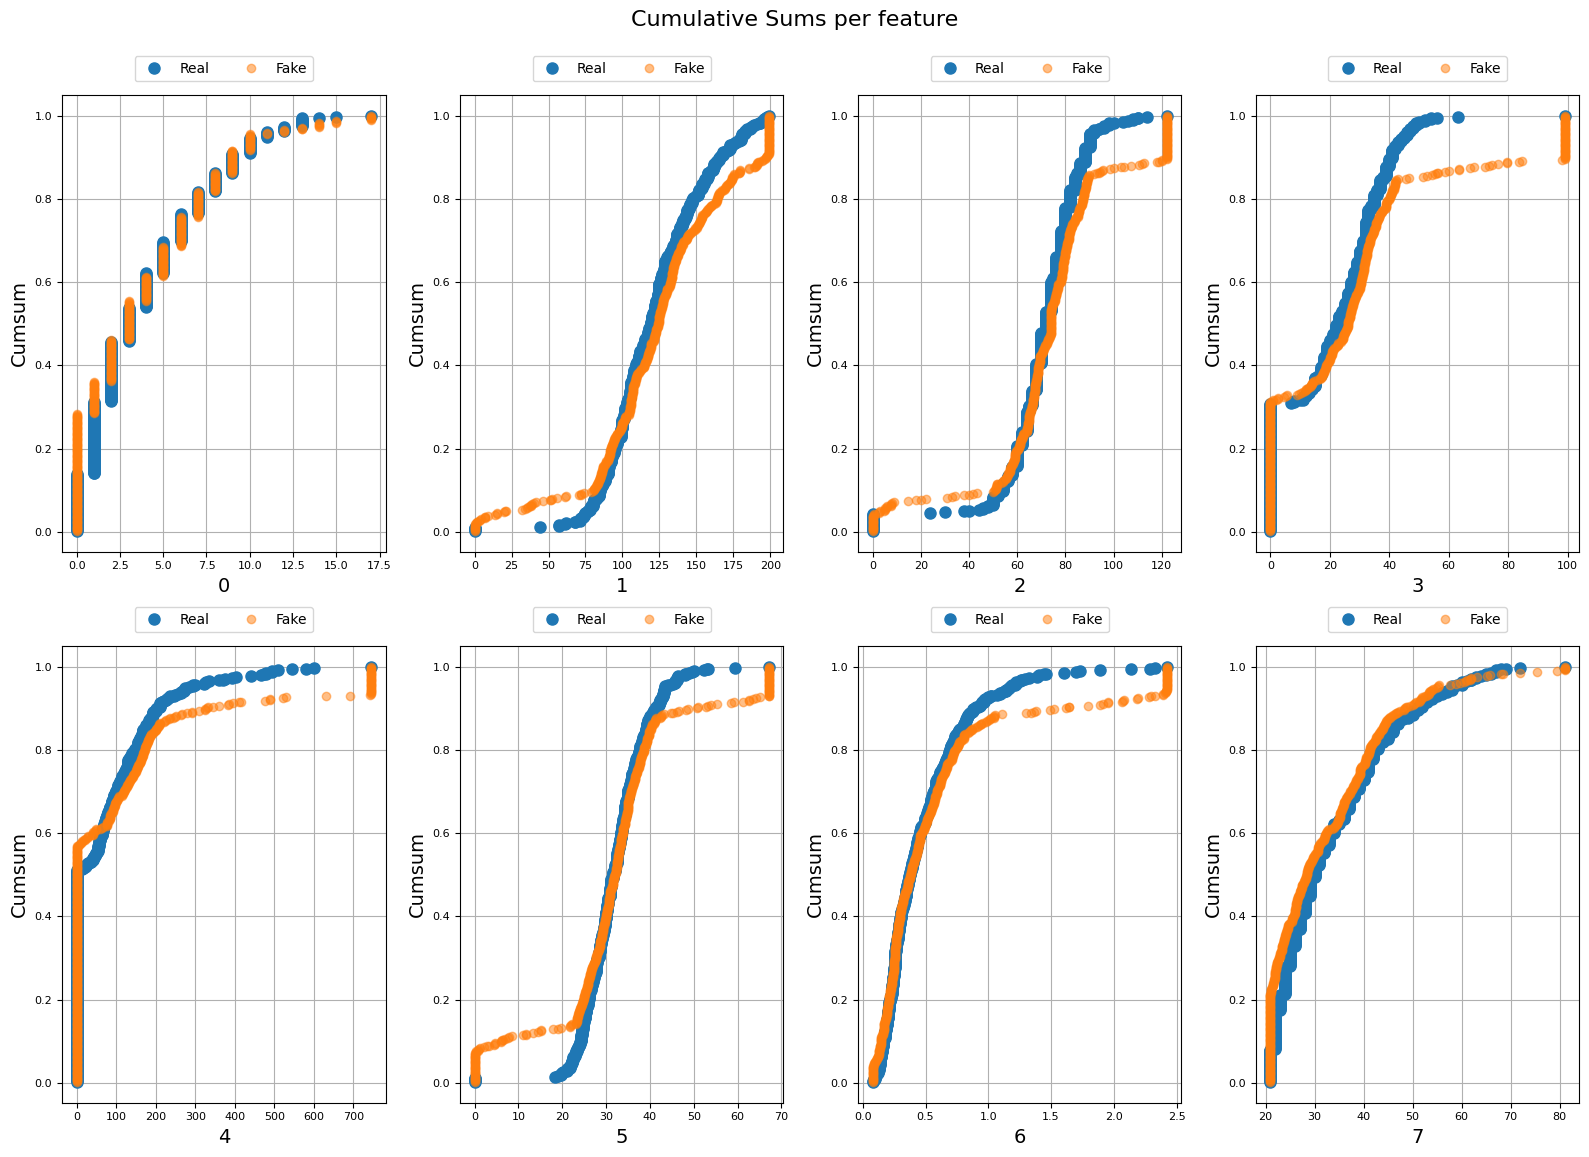

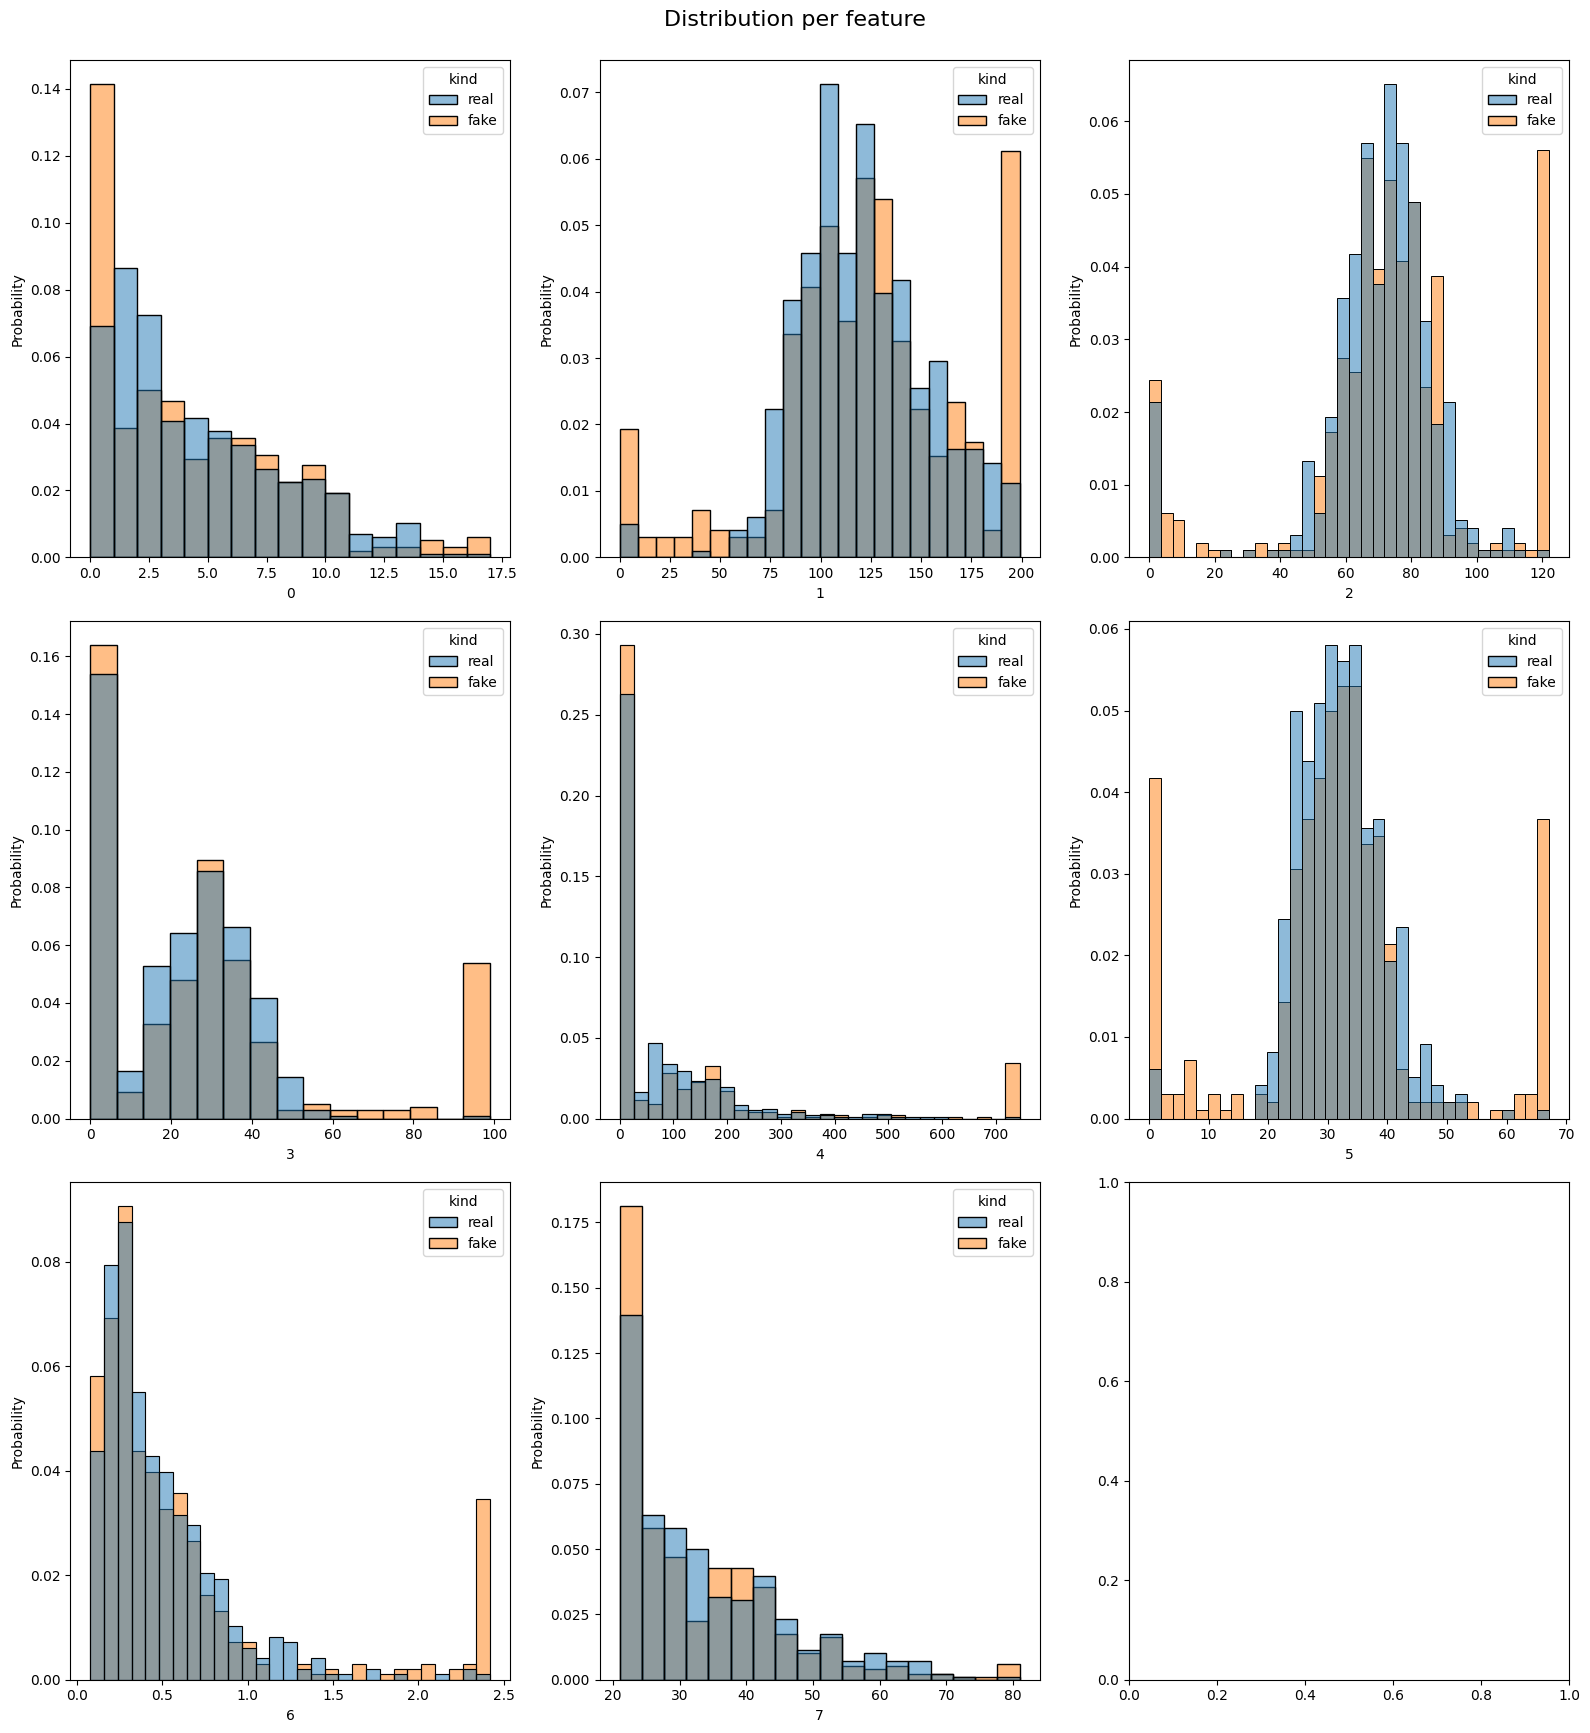

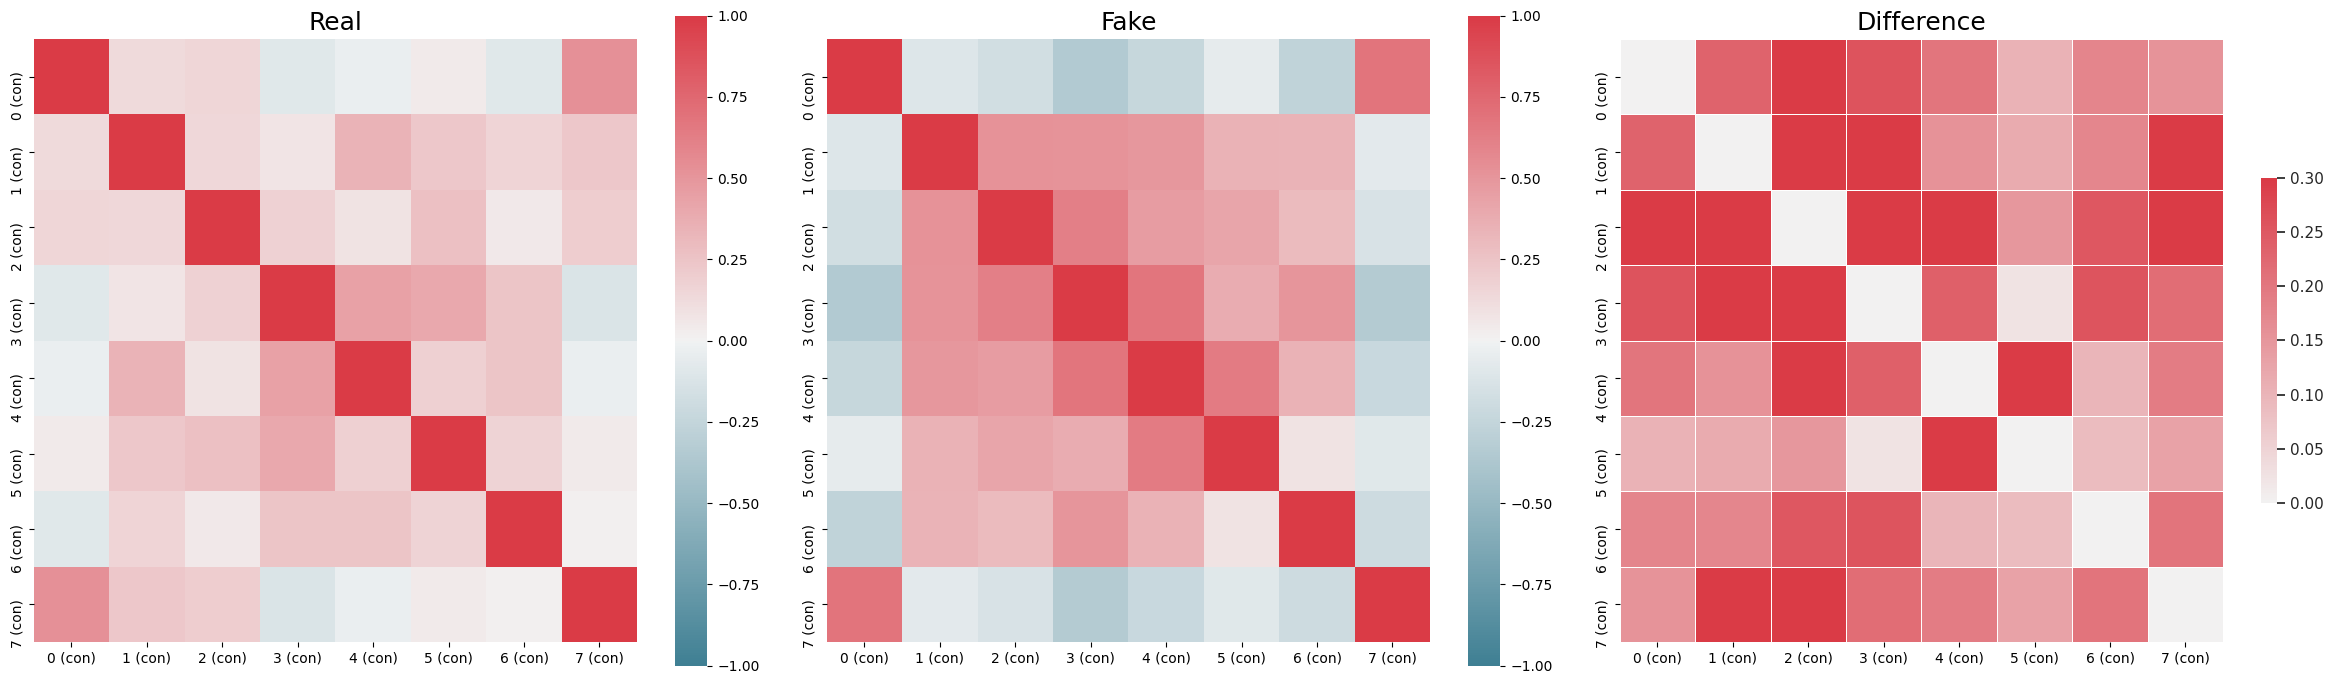

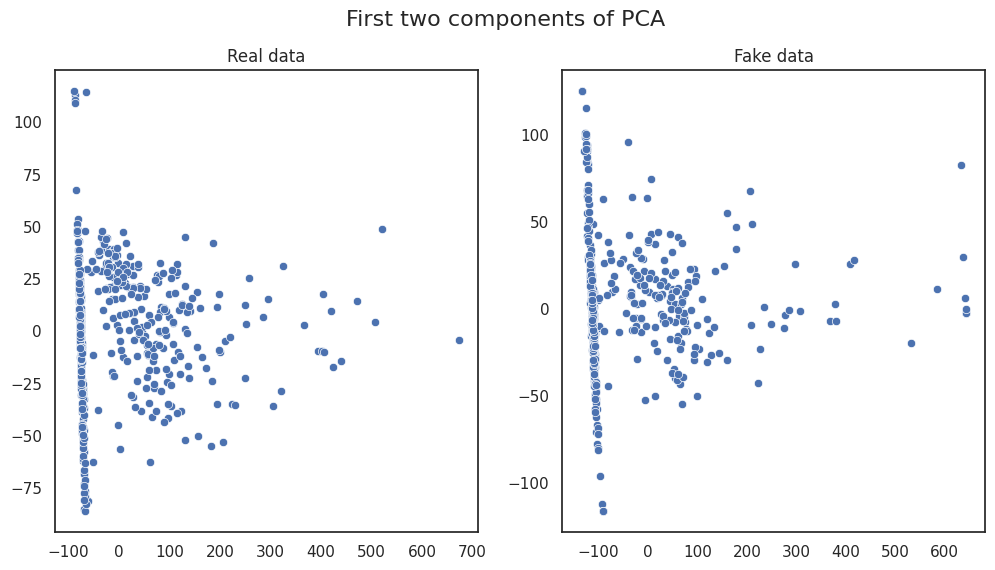

In [3]:
syndata_array = np.load('/home/vtn/master/tab-ddpm-main/exp/diabetes/ddpm_cb_best/X_num_train.npy')

syndataPD = pd.DataFrame(syndata_array)
syndataPD
origdata_array = np.load('/home/vtn/master/tab-ddpm-main/data/diabetes/X_num_train.npy')
origdataPD = pd.DataFrame(origdata_array)
origdataPD
from table_evaluator import load_data, TableEvaluator

real, fake = origdataPD, syndataPD
table_evaluator = TableEvaluator(real, fake)
table_evaluator.visual_evaluation()


In [4]:
table_evaluator.evaluate(target_col=0)


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2020   0.2020              0.1579
DecisionTreeClassifier_real   0.1111   0.1111              0.0645
LogisticRegression_fake       0.1515   0.2727              0.1061
LogisticRegression_real       0.1212   0.1313              0.0879
MLPClassifier_fake            0.2323   0.2626              0.1379
MLPClassifier_real            0.1818   0.1313              0.1250
RandomForestClassifier_fake   0.2525   0.2727              0.1512
RandomForestClassifier_real   0.1313   0.1616              0.1000

Privacy results:
                                          result
Duplicate rows between sets (real/fake)  (0, 39)
nearest neighbor mean                     1.2664
nearest neighbor std                      0.5861

Miscellaneous results:
                                  Result
Column

,0,1,2,3,4,5,6,7
0,0.0000,136.4033,69.2714,31.5053,0.0000,31.7490,0.2714,21.4298
1,6.0000,143.1789,82.0367,0.0000,0.0000,32.6044,0.1255,46.9200
2,7.0000,136.0177,76.5710,31.2080,0.0000,32.7208,0.2539,42.0439
3,1.0000,72.2041,57.6138,33.6288,0.0000,32.5107,0.2495,21.3366
4,0.0000,35.3705,54.5348,20.7391,0.0000,32.4250,0.1298,22.8879
...,...,...,...,...,...,...,...,...
495,2.0000,55.5931,76.6214,20.7672,118.3543,39.3353,0.2085,22.4145
496,1.0000,125.1886,66.3397,18.6986,132.5087,11.7006,0.5224,23.3568
497,8.0000,194.3797,59.0732,0.0000,0.0000,38.5971,0.5513,35.6254
498,2.0000,20.5077,67.3609,2.5275,0.0000,15.0597,0.7123,21.0000
